# Library Data Analysis

In [122]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning

In [123]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
# =========================== Machine Learning ==================================
#== First Algorithm
# Calssification
from sklearn.linear_model import LogisticRegression
#== Second Algorithm
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
#== Third Algorithm
# Support Vector machine
from sklearn.svm import SVC
#== Fourth Algorithm
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# ==== Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,accuracy_score

# Perform The Analysis

In [124]:
df = pd.read_csv(r'H:\Programming\AI\Course\Machine Learning\Session 3\salaries.csv')
print(df.columns.values)

['Unnamed: 0' 'work_year' 'experience_level' 'employment_type' 'job_title'
 'salary' 'salary_currency' 'salary_in_usd' 'employee_residence'
 'remote_ratio' 'company_location' 'company_size' 'salary_range']


In [125]:
df.head(4)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Medium
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,High
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Medium
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Low


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
 12  salary_range        607 non-null    object
dtypes: int64(5), object(8)
memory usage: 61.8+ KB


In [127]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [128]:
df.drop(['Unnamed: 0','salary','salary_currency','salary_in_usd'],axis=1,inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,MI,FT,Data Scientist,DE,0,DE,L,Medium
1,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S,High
2,2020,SE,FT,Big Data Engineer,GB,50,GB,M,Medium
3,2020,MI,FT,Product Data Analyst,HN,0,HN,S,Low
4,2020,SE,FT,Machine Learning Engineer,US,50,US,L,Medium


In [129]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary_range          0
dtype: int64

In [130]:
df.duplicated().sum()

199

In [131]:
# df.drop_duplicates(inplace=True)

In [132]:
df.duplicated().sum()

199

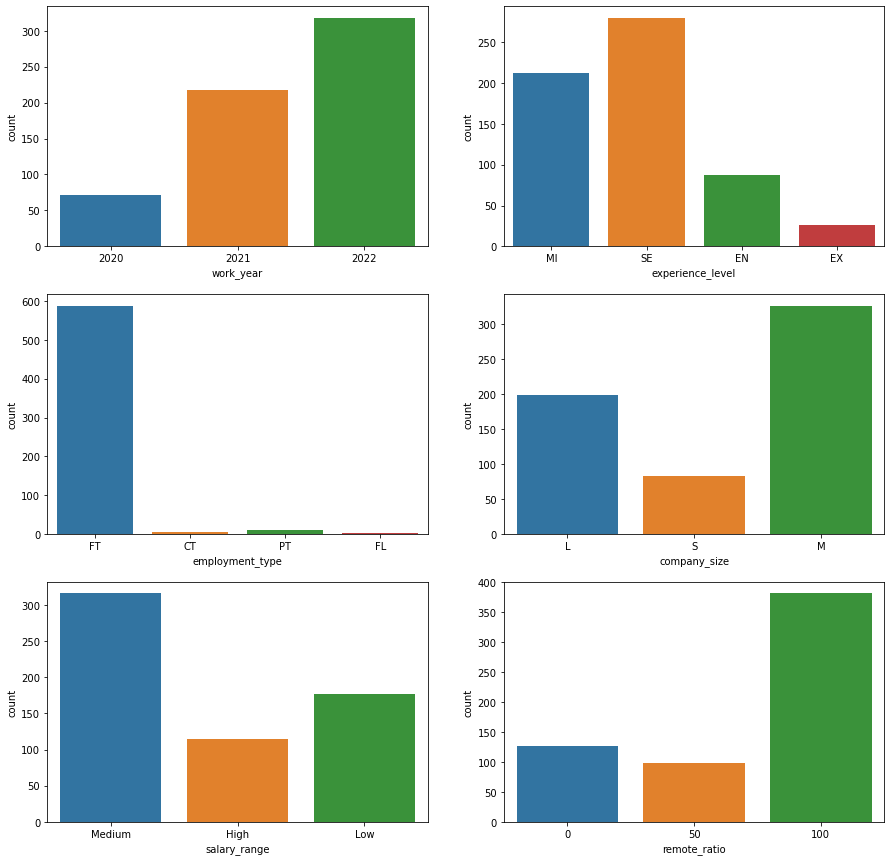

In [133]:
plt.figure(figsize=[15,15])
plt.subplot(3,2,1)
sns.countplot(data=df,x='work_year');
plt.subplot(3,2,2)
sns.countplot(data=df,x='experience_level');
plt.subplot(3,2,3)
sns.countplot(data=df,x='employment_type');
plt.subplot(3,2,4)
sns.countplot(data=df,x='company_size');
plt.subplot(3,2,5)
sns.countplot(data=df,x='salary_range');
plt.subplot(3,2,6)
sns.countplot(data=df,x='remote_ratio');

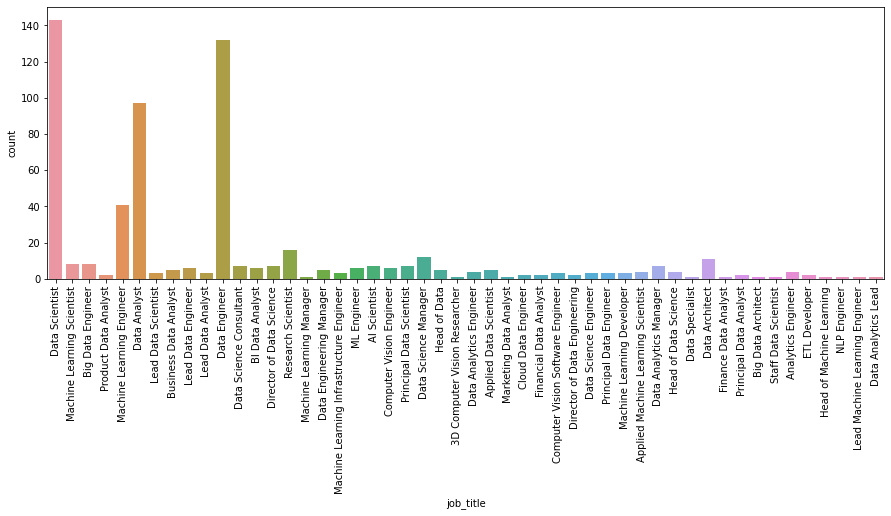

In [134]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.countplot(data=df,x='job_title');

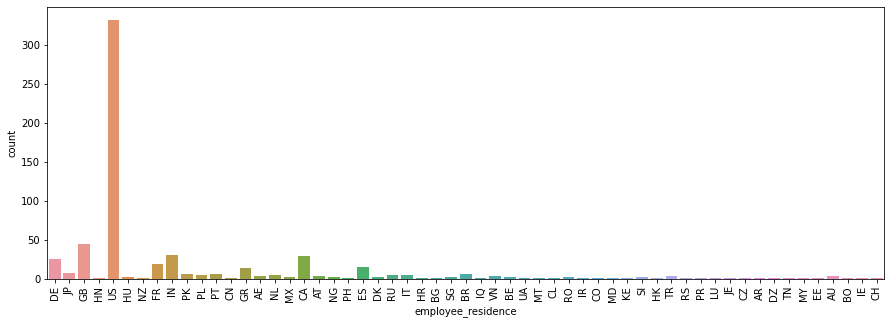

In [135]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.countplot(data=df,x='employee_residence');

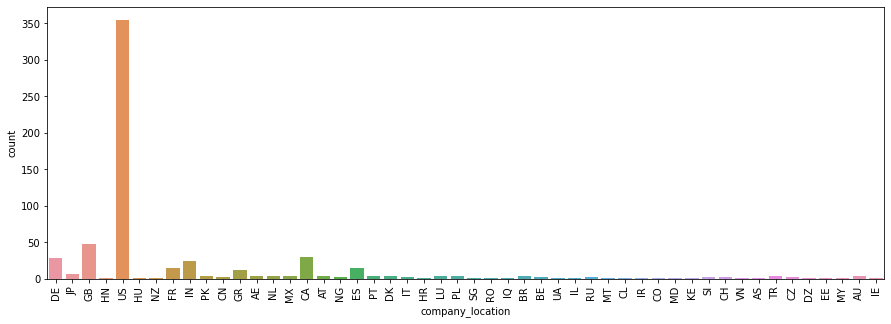

In [136]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.countplot(data=df,x='company_location');

# Perform The Machine Learning Model

In [137]:
# encode the rest of categorical data
df = pd.get_dummies(df,columns=['work_year','experience_level','employment_type','job_title','employee_residence','remote_ratio','company_location','company_size'])
df.head(8)

,salary_range,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,Medium,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,High,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Medium,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Low,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Medium,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5,Medium,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,High,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
7,Low,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [138]:
df['salary_range'] = df['salary_range'].map({'Low':0,'Medium':1,'High':2}).astype(int)

In [139]:
df.head()

,salary_range,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [140]:
x_train = df.drop('salary_range',axis=1)
y_train = df['salary_range']
x_train.shape,y_train.shape

((607, 174), (607,))

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.3,random_state=42) 

In [142]:
# ====================== First Algorithm =========================
# Classification OR logistic Regression
classify = LogisticRegression()
classify.fit(x_train,y_train)
y_predict = classify.predict(x_test)
acc_classify = round(classify.score(x_train,y_train)*100,2)
acc_classify

78.07

In [143]:
# ====================== Second Algorithm =========================
# Decision Tree 
decision_tree = DecisionTreeClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=1)
decision_tree.fit(x_train,y_train)
y_predict = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train,y_train)*100,2)
acc_decision_tree

87.03

In [144]:
## Grid Search for support vector machine 
paremetrs = {'kernel':['poly'],'degree':[2,10,15,25,30,40,50],'C':[1,10,20,30,40]}

score = make_scorer(accuracy_score)

svm = SVC()

grid_object = GridSearchCV(svm,paremetrs,scoring=score)

grid_fit = grid_object.fit(x_train,y_train)

best_clf = grid_fit.best_estimator_
best_clf

SVC(C=1, degree=2, kernel='poly')

In [145]:
# ====================== Third Algorithm =========================
# Support Vector Machine
svm = SVC(C=5,kernel='poly',degree=150)
svm.fit(x_train,y_train)
y_predict = svm.predict(x_test)
acc_svm = round(svm.score(x_train,y_train)*100,2)
acc_svm

87.03

In [146]:
# ====================== Fourth Algorithm =========================
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_predict = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train,y_train)*100,2)
acc_random_forest

87.03

In [147]:
### ============= Model Evaluation ================
# The Best Model 
machine_learning_models= pd.DataFrame({
    'Model':['Classification','Decision Tree','Support Vector Machine','Random Forest'],
    'Score':[acc_classify,acc_decision_tree,acc_svm,acc_random_forest]
})
machine_learning_models.sort_values(by='Score',ascending=False)

,Model,Score
1,Decision Tree,87.03
2,Support Vector Machine,87.03
3,Random Forest,87.03
0,Classification,78.07
